In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/capstone project/dataset.csv")

In [3]:
df.head()

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00


In [4]:
df.describe()

,ID,Capacity,Latitude,Longitude,Occupancy,QueueLength,IsSpecialDay
count,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000
mean,9183.500000,1605.214286,25.706547,90.751170,731.084059,4.587925,0.150915
std,5302.529208,1131.153886,1.582749,3.536636,621.164982,2.580062,0.357975
min,0.000000,387.000000,20.000035,78.000003,2.000000,0.000000,0.000000
25%,4591.750000,577.000000,26.140048,91.727995,322.000000,2.000000,0.000000
50%,9183.500000,1261.000000,26.147482,91.729511,568.000000,4.000000,0.000000
75%,13775.250000,2803.000000,26.147541,91.736172,976.000000,6.000000,0.000000
max,18367.000000,3883.000000,26.150504,91.740994,3499.000000,15.000000,1.000000


In [5]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
# MODEL 1 : BASELINE LINEAR MODEL

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare clean base data
lot_id = df["SystemCodeNumber"].unique()[0]
lot_data_base = df[df["SystemCodeNumber"] == lot_id].copy()

lot_data_base["Timestamp"] = pd.to_datetime(
    lot_data_base["LastUpdatedDate"] + " " + lot_data_base["LastUpdatedTime"],
    format="%d-%m-%Y %H:%M:%S"
)

lot_data_base = lot_data_base.sort_values("Timestamp").reset_index(drop=True)
lot_data_base["Date"] = lot_data_base["Timestamp"].dt.date


In [9]:
def simple_linear_model(prev_price, occupancy, capacity, alpha=3.0):
    occupancy_ratio = occupancy / capacity
    new_price = prev_price + alpha * occupancy_ratio
    return new_price

# Compute simple model
alpha = 3.0
base_price = 10.0

prices_simple = [base_price]

for idx, row in lot_data_base.iloc[1:].iterrows():
    prev_price = prices_simple[-1]
    occupancy = row["Occupancy"]
    capacity = row["Capacity"]
    new_price = simple_linear_model(prev_price, occupancy, capacity, alpha)
    prices_simple.append(new_price)

lot_data_simple = lot_data_base.iloc[1:].copy()
lot_data_simple["ComputedPriceSimple"] = prices_simple[1:]


In [10]:
lot_data_simple.head(10)

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp,Date,ComputedPriceSimple
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00,2016-10-04 08:25:00,2016-10-04,10.332756
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00,2016-10-04 08:59:00,2016-10-04,10.748700
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00,2016-10-04 09:32:00,2016-10-04,11.305026
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00,2016-10-04 09:59:00,2016-10-04,12.084922
5,5,BHMBCCMKT01,577,26.144536,91.736172,177,car,low,3,0,04-10-2016,10:26:00,2016-10-04 10:26:00,2016-10-04,13.005199
6,6,BHMBCCMKT01,577,26.144536,91.736172,219,truck,high,6,0,04-10-2016,10:59:00,2016-10-04 10:59:00,2016-10-04,14.143847
7,7,BHMBCCMKT01,577,26.144536,91.736172,247,car,average,5,0,04-10-2016,11:25:00,2016-10-04 11:25:00,2016-10-04,15.428076
8,8,BHMBCCMKT01,577,26.144536,91.736172,259,cycle,average,5,0,04-10-2016,11:59:00,2016-10-04 11:59:00,2016-10-04,16.774697
9,9,BHMBCCMKT01,577,26.144536,91.736172,266,bike,high,8,0,04-10-2016,12:29:00,2016-10-04 12:29:00,2016-10-04,18.157712
10,10,BHMBCCMKT01,577,26.144536,91.736172,269,car,high,7,0,04-10-2016,13:02:00,2016-10-04 13:02:00,2016-10-04,19.556326


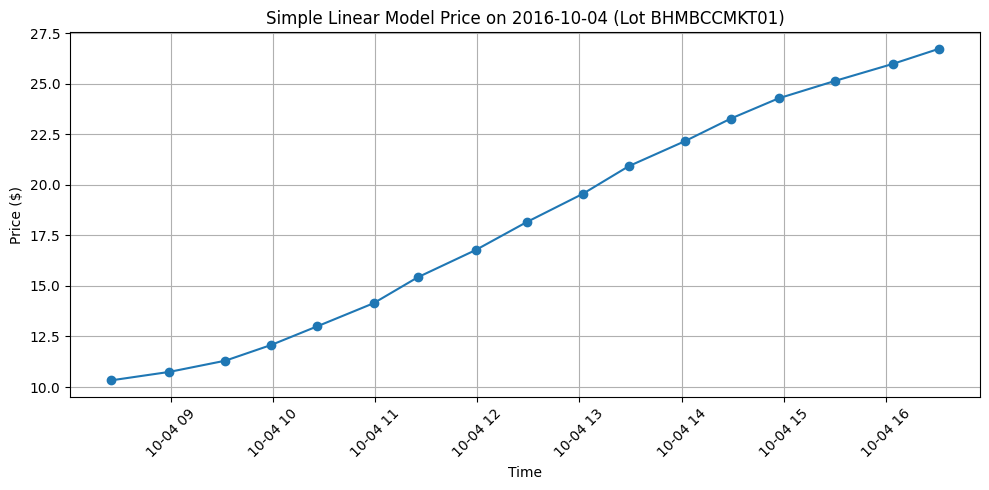

In [11]:
# Plot simple model for one day
first_date_simple = lot_data_simple["Date"].unique()[0]
one_day_simple = lot_data_simple[lot_data_simple["Date"] == first_date_simple]

plt.figure(figsize=(10,5))
plt.plot(
    one_day_simple["Timestamp"],
    one_day_simple["ComputedPriceSimple"],
    marker="o"
)
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.title(f"Simple Linear Model Price on {first_date_simple} (Lot {lot_id})")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# MODEL 1.5 : SMOTHENING PRICE AND BOUNDARY FOR LINEAR MODEL

In [13]:
# Define smooth model
def baseline_linear_model_smooth_minmax(
    prev_price,
    occupancy,
    capacity,
    min_price=5.0,
    max_price=20.0,
    beta=0.3
):
    occupancy_ratio = occupancy / capacity
    target_price = min_price + (max_price - min_price) * occupancy_ratio
    new_price = prev_price + beta * (target_price - prev_price)
    return new_price

# Compute smooth model
min_price = 5.0
max_price = 20.0
beta = 0.3
prices_smooth = [10.0]

for idx, row in lot_data_base.iloc[1:].iterrows():
    prev_price = prices_smooth[-1]
    occupancy = row["Occupancy"]
    capacity = row["Capacity"]
    new_price = baseline_linear_model_smooth_minmax(
        prev_price, occupancy, capacity, min_price, max_price, beta
    )
    prices_smooth.append(new_price)

lot_data_smooth = lot_data_base.iloc[1:].copy()
lot_data_smooth["ComputedPriceSmooth"] = prices_smooth[1:]


In [14]:
lot_data_smooth.head(10)

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp,Date,ComputedPriceSmooth
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00,2016-10-04 08:25:00,2016-10-04,8.999133
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00,2016-10-04 08:59:00,2016-10-04,8.423310
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00,2016-10-04 09:32:00,2016-10-04,8.230806
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00,2016-10-04 09:59:00,2016-10-04,8.431408
5,5,BHMBCCMKT01,577,26.144536,91.736172,177,car,low,3,0,04-10-2016,10:26:00,2016-10-04 10:26:00,2016-10-04,8.782402
6,6,BHMBCCMKT01,577,26.144536,91.736172,219,truck,high,6,0,04-10-2016,10:59:00,2016-10-04 10:59:00,2016-10-04,9.355653
7,7,BHMBCCMKT01,577,26.144536,91.736172,247,car,average,5,0,04-10-2016,11:25:00,2016-10-04 11:25:00,2016-10-04,9.975301
8,8,BHMBCCMKT01,577,26.144536,91.736172,259,cycle,average,5,0,04-10-2016,11:59:00,2016-10-04 11:59:00,2016-10-04,10.502641
9,9,BHMBCCMKT01,577,26.144536,91.736172,266,bike,high,8,0,04-10-2016,12:29:00,2016-10-04 12:29:00,2016-10-04,10.926372
10,10,BHMBCCMKT01,577,26.144536,91.736172,269,car,high,7,0,04-10-2016,13:02:00,2016-10-04 13:02:00,2016-10-04,11.246381


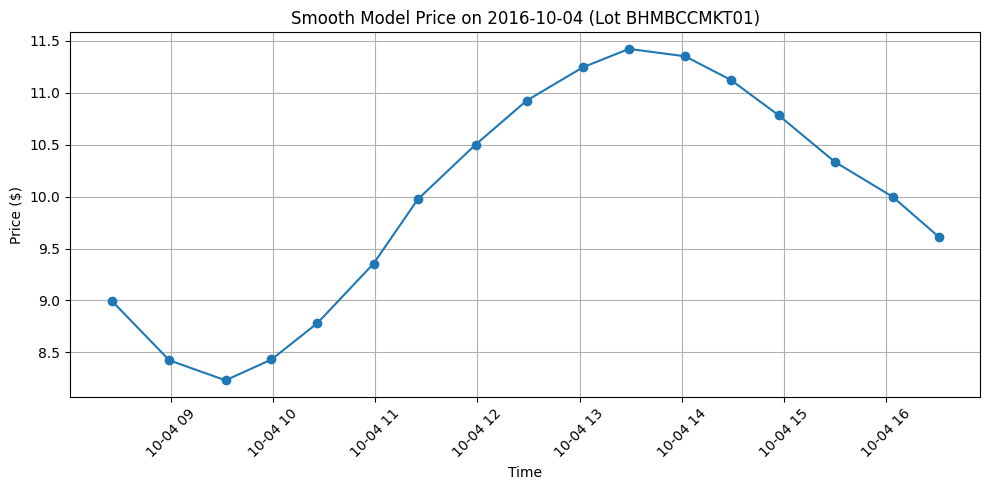

In [15]:
# Plot smooth model for one day
first_date_smooth = lot_data_smooth["Date"].unique()[0]
one_day_smooth = lot_data_smooth[lot_data_smooth["Date"] == first_date_smooth]

plt.figure(figsize=(10,5))
plt.plot(
    one_day_smooth["Timestamp"],
    one_day_smooth["ComputedPriceSmooth"],
    marker="o"
)
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.title(f"Smooth Model Price on {first_date_smooth} (Lot {lot_id})")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# MODEL 2.0 : DEMAND BASED PRICE FUNCTION

In [16]:
df["VehicleType"].unique()

array(['car', 'bike', 'truck', 'cycle'], dtype=object)

In [17]:
df["VehicleType"].value_counts()

,count
VehicleType,
car,11166
bike,3624
truck,1809
cycle,1769


In [18]:
df["TrafficConditionNearby"].unique()

array(['low', 'high', 'average'], dtype=object)

In [19]:
lot_data_numeric = lot_data_base.copy()

# Map TrafficConditionNearby to numeric
traffic_map = {
    "low": 0,
    "average": 0.5,
    "high": 1
}
lot_data_numeric["TrafficNumeric"] = lot_data_numeric["TrafficConditionNearby"].map(traffic_map)

# Map VehicleType to numeric
vehicle_factor_map = {
    "cycle": 0.5,
    "bike": 1.0,
    "car": 2.0,
    "truck": 4.0
}
lot_data_numeric["VehicleTypeNumeric"] = lot_data_numeric["VehicleType"].map(vehicle_factor_map)

# Compute Occupancy Ratio
lot_data_numeric["OccupancyRatio"] = lot_data_numeric["Occupancy"] / lot_data_numeric["Capacity"]

# Show the first few rows to confirm
lot_data_numeric[["TrafficConditionNearby", "TrafficNumeric", "VehicleType", "VehicleTypeNumeric", "Occupancy", "Capacity", "OccupancyRatio"]].head(10)



,TrafficConditionNearby,TrafficNumeric,VehicleType,VehicleTypeNumeric,Occupancy,Capacity,OccupancyRatio
0,low,0.0,car,2.0,61,577,0.105719
1,low,0.0,car,2.0,64,577,0.110919
2,low,0.0,car,2.0,80,577,0.138648
3,low,0.0,car,2.0,107,577,0.185442
4,low,0.0,bike,1.0,150,577,0.259965
5,low,0.0,car,2.0,177,577,0.306759
6,high,1.0,truck,4.0,219,577,0.379549
7,average,0.5,car,2.0,247,577,0.428076
8,average,0.5,cycle,0.5,259,577,0.448873
9,high,1.0,bike,1.0,266,577,0.461005


In [20]:
import seaborn as sns

# 1️⃣ Select only the columns you specified
corr_columns = [
    "TrafficNumeric",
    "VehicleTypeNumeric",
    "OccupancyRatio",
    "IsSpecialDay",
    "QueueLength"
]

corr_matrix = lot_data_numeric[corr_columns].corr()
print(corr_matrix)

                    TrafficNumeric  VehicleTypeNumeric  OccupancyRatio  \
TrafficNumeric            1.000000            0.005693        0.444166   
VehicleTypeNumeric        0.005693            1.000000       -0.000891   
OccupancyRatio            0.444166           -0.000891        1.000000   
IsSpecialDay              0.001727            0.021904       -0.121302   
QueueLength               0.881546            0.001980        0.516509   

                    IsSpecialDay  QueueLength  
TrafficNumeric          0.001727     0.881546  
VehicleTypeNumeric      0.021904     0.001980  
OccupancyRatio         -0.121302     0.516509  
IsSpecialDay            1.000000     0.176278  
QueueLength             0.176278     1.000000  


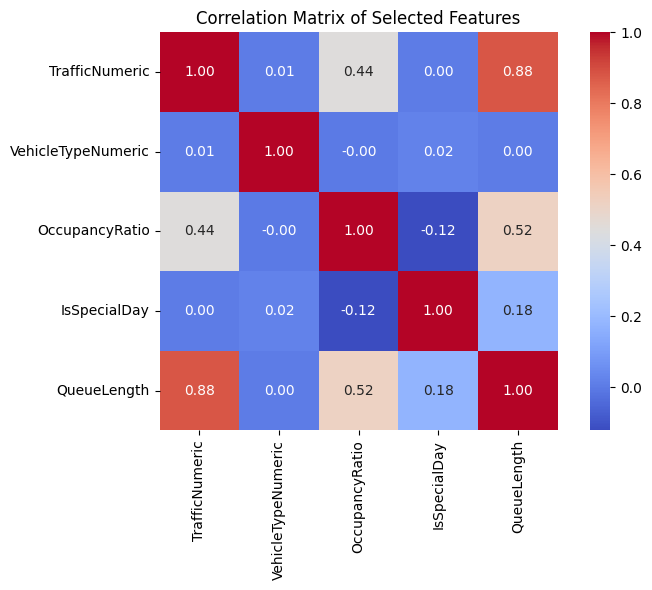

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True
)
plt.title("Correlation Matrix of Selected Features")
plt.tight_layout()
plt.show()

In [23]:
# WE WILL HAVE TO DROP THE TERM OF TRAFFICNUMERIC DUE TO MULTICOLLINEARITY

In [22]:
alpha = 3
beta = 0.3

# Create a copy to avoid overwriting
final_demand_df = lot_data_numeric.copy()

# Compute Demand using the finalized formula
final_demand_df["Demand"] = (
    alpha * final_demand_df["OccupancyRatio"]
    * (1 + final_demand_df["IsSpecialDay"])
    * final_demand_df["VehicleTypeNumeric"]
    + beta * final_demand_df["QueueLength"]
)

# Preview the result
final_demand_df[
    ["Demand", "OccupancyRatio", "IsSpecialDay", "VehicleTypeNumeric", "QueueLength"]
].head(10)


,Demand,OccupancyRatio,IsSpecialDay,VehicleTypeNumeric,QueueLength
0,0.934315,0.105719,0,2.0,1
1,0.965511,0.110919,0,2.0,1
2,1.431889,0.138648,0,2.0,2
3,1.712652,0.185442,0,2.0,2
4,1.379896,0.259965,0,1.0,2
5,2.740555,0.306759,0,2.0,3
6,6.354593,0.379549,0,4.0,6
7,4.068458,0.428076,0,2.0,5
8,2.173310,0.448873,0,0.5,5
9,3.783016,0.461005,0,1.0,8


In [23]:
#  Normalize Demand to 0–1
demand_min = final_demand_df["Demand"].min()
demand_max = final_demand_df["Demand"].max()

final_demand_df["DemandNormalized"] = (
    (final_demand_df["Demand"] - demand_min) / (demand_max - demand_min)
)

MinPrice = 5
MaxPrice = 20

# Compute Price
final_demand_df["Price"] = (
    MinPrice + (MaxPrice - MinPrice) * final_demand_df["DemandNormalized"]
)

print("Price range:")
print("Min price:", final_demand_df["Price"].min())
print("Max price:", final_demand_df["Price"].max())

final_demand_df[["DemandNormalized", "Price"]].head(10)


Price range:
Min price: 5.0
Max price: 20.0


,DemandNormalized,Price
0,0.064667,5.970004
1,0.066875,6.003128
2,0.099890,6.498344
3,0.119764,6.796467
4,0.096209,6.443136
5,0.192529,7.887928
6,0.448362,11.725432
7,0.286529,9.297939
8,0.152374,7.285609
9,0.266323,8.994847


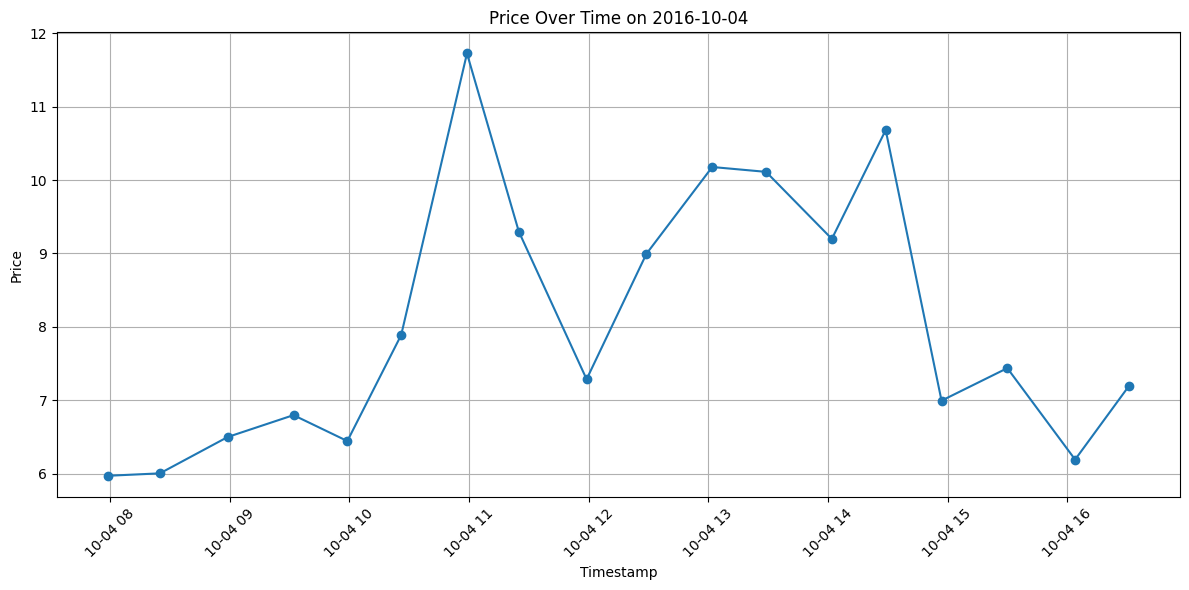

In [26]:
first_date = final_demand_df["Date"].min()

# Filter that day's data from final_demand_df
one_day_df = final_demand_df[final_demand_df["Date"] == first_date].reset_index(drop=True)

one_day_df["Timestamp"] = pd.to_datetime(one_day_df["Timestamp"])

# 🛠️ 4. Plot
plt.figure(figsize=(12,6))
plt.plot(
    one_day_df["Timestamp"],
    one_day_df["Price"],
    marker="o",
    linestyle="-"
)
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title(f"Price Over Time on {first_date}")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
BasePrice = 10
ScalingFactor = 0.5

final_demand_df["Price_Compressed"] = (
    BasePrice + ScalingFactor * (final_demand_df["Price"] - BasePrice)
)


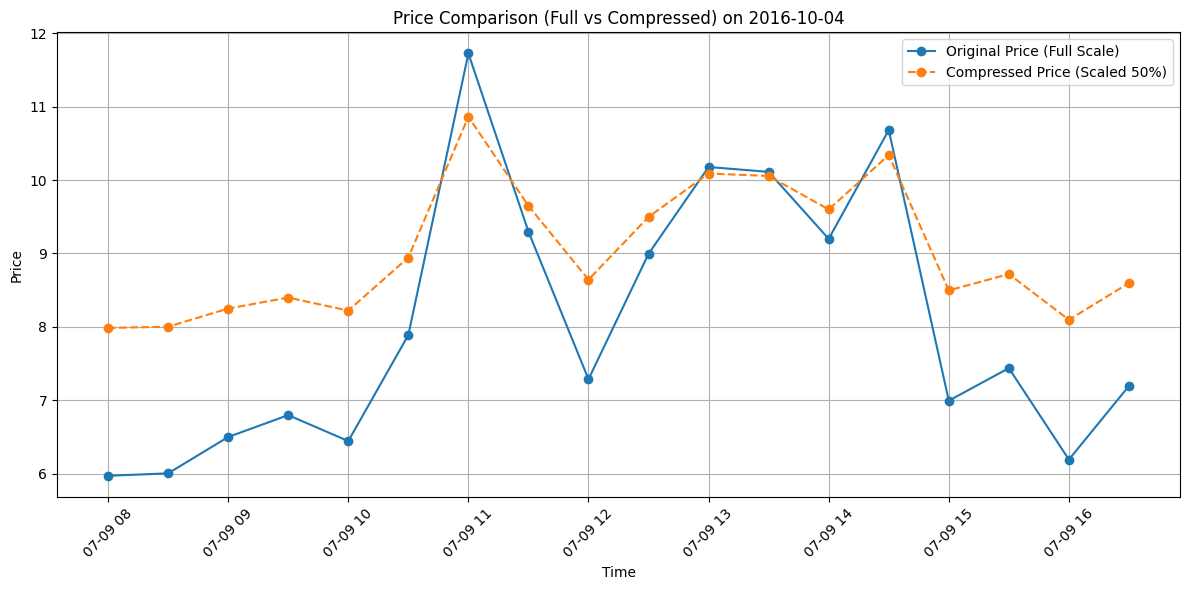

In [46]:
first_date = final_demand_df["Date"].min()

# Filter the data for the first date
one_day_df = final_demand_df[final_demand_df["Date"] == first_date].reset_index(drop=True)

# Create 30-minute interval timeslots starting at 8:00 AM
start_time = pd.Timestamp("08:00")
one_day_df["TimeSlot"] = one_day_df.index.map(lambda x: start_time + pd.Timedelta(minutes=30 * x))
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Full variation price
plt.plot(
    one_day_df["TimeSlot"],
    one_day_df["Price"],
    marker="o",
    linestyle="-",
    label="Original Price (Full Scale)"
)

# Compressed variation price
plt.plot(
    one_day_df["TimeSlot"],
    one_day_df["Price_Compressed"],
    marker="o",
    linestyle="--",
    label="Compressed Price (Scaled 50%)"
)

plt.xlabel("Time")
plt.ylabel("Price")
plt.title(f"Price Comparison (Full vs Compressed) on {first_date}")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [28]:
# ABOVE DEMAND FUNCTION IS NOT SO SMOOTH

In [29]:
# MODEL 2.1 : TRYING A ADDITIVE DEMAND FUNCTION

In [30]:
# New additive demand function with upward bias
final_demand_df["Demand_Capitalist"] = (
    0.7 * final_demand_df["OccupancyRatio"]
    + 0.3 * final_demand_df["IsSpecialDay"]
    + 0.2 * final_demand_df["QueueLength"]
    + 0.1 * final_demand_df["VehicleTypeNumeric"]
    + 0.3  # upward bias to keep demand generally higher
)


In [31]:
# Normalize to 0–1
demand_min = final_demand_df["Demand_Capitalist"].min()
demand_max = final_demand_df["Demand_Capitalist"].max()

final_demand_df["Demand_Capitalist_Normalized"] = (
    (final_demand_df["Demand_Capitalist"] - demand_min) / (demand_max - demand_min)
)


In [32]:
MinPrice = 5
MaxPrice = 20

final_demand_df["Price_Capitalist"] = (
    MinPrice + (MaxPrice - MinPrice) * final_demand_df["Demand_Capitalist_Normalized"]
)


In [33]:
first_date = final_demand_df["Date"].min()
one_day_df = final_demand_df[final_demand_df["Date"] == first_date].reset_index(drop=True)


In [34]:
start_time = pd.Timestamp("08:00")
one_day_df["TimeSlot"] = one_day_df.index.map(lambda x: start_time + pd.Timedelta(minutes=30 * x))


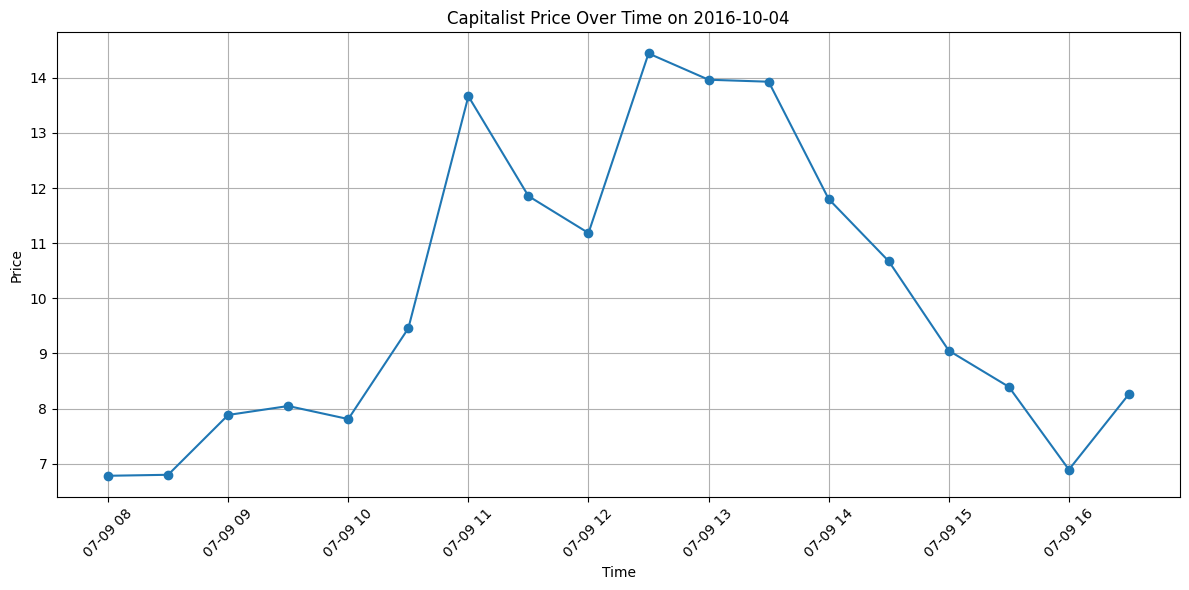

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(
    one_day_df["TimeSlot"],
    one_day_df["Price_Capitalist"],
    marker="o",
    linestyle="-"
)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title(f"Capitalist Price Over Time on {first_date}")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
# Compute 50% scaled price
MinPrice = 5
MaxPrice = 20

final_demand_df["Price_Capitalist_50pct"] = (
    MinPrice + 0.5 * (MaxPrice - MinPrice) * final_demand_df["Demand_Capitalist_Normalized"]
)


In [37]:
first_date = final_demand_df["Date"].min()
one_day_df = final_demand_df[final_demand_df["Date"] == first_date].reset_index(drop=True)


In [38]:
start_time = pd.Timestamp("08:00")
one_day_df["TimeSlot"] = one_day_df.index.map(lambda x: start_time + pd.Timedelta(minutes=30 * x))


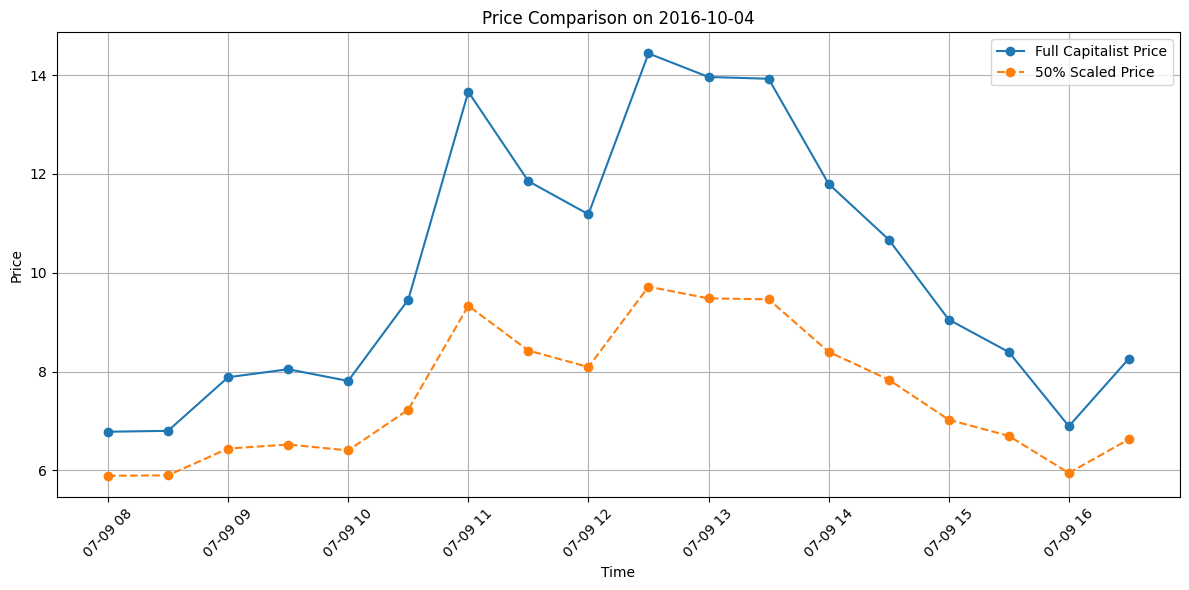

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(
    one_day_df["TimeSlot"],
    one_day_df["Price_Capitalist"],
    marker="o",
    linestyle="-",
    label="Full Capitalist Price"
)

plt.plot(
    one_day_df["TimeSlot"],
    one_day_df["Price_Capitalist_50pct"],
    marker="o",
    linestyle="--",
    label="50% Scaled Price"
)

plt.xlabel("Time")
plt.ylabel("Price")
plt.title(f"Price Comparison on {first_date}")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [40]:
# Define base price around which to dampen extremes
BasePrice = 10
ScalingFactor = 0.4  # Reduce highs/lows by 50%

# Compute smoothed price
final_demand_df["Price_Capitalist_Smoothed"] = (
    BasePrice + ScalingFactor * (final_demand_df["Price_Capitalist"] - BasePrice)
)


In [41]:
# Filter first date
first_date = final_demand_df["Date"].min()
one_day_df = final_demand_df[final_demand_df["Date"] == first_date].reset_index(drop=True)

# TimeSlot column (30-min intervals starting 8AM)
start_time = pd.Timestamp("08:00")
one_day_df["TimeSlot"] = one_day_df.index.map(lambda x: start_time + pd.Timedelta(minutes=30 * x))


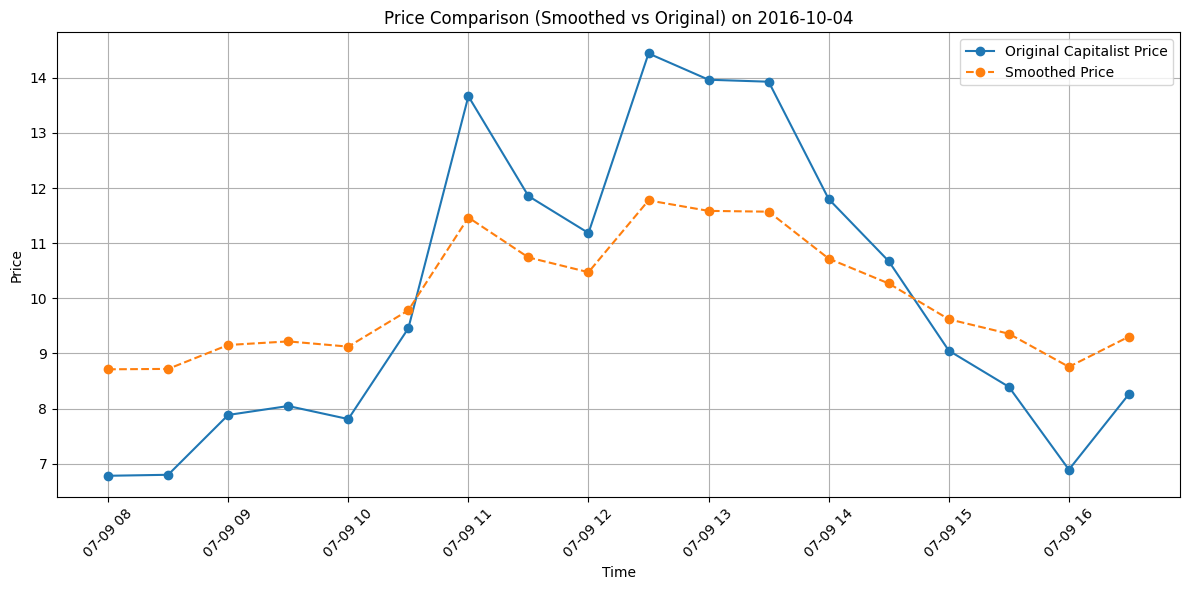

In [42]:

plt.figure(figsize=(12,6))

plt.plot(
    one_day_df["TimeSlot"],
    one_day_df["Price_Capitalist"],
    marker="o",
    linestyle="-",
    label="Original Capitalist Price"
)

plt.plot(
    one_day_df["TimeSlot"],
    one_day_df["Price_Capitalist_Smoothed"],
    marker="o",
    linestyle="--",
    label="Smoothed Price"
)

plt.xlabel("Time")
plt.ylabel("Price")
plt.title(f"Price Comparison (Smoothed vs Original) on {first_date}")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [43]:
# Show table of relevant columns
one_day_df[
    [
        "SystemCodeNumber",
        "TimeSlot",
        "Demand_Capitalist_Normalized",
        "Price_Capitalist",
        "Price_Capitalist_Smoothed"
    ]
].head(20)  # You can adjust the number here if you want to see more rows


,SystemCodeNumber,TimeSlot,Demand_Capitalist_Normalized,Price_Capitalist,Price_Capitalist_Smoothed
0,BHMBCCMKT01,2025-07-09 08:00:00,0.118867,6.783001,8.713200
1,BHMBCCMKT01,2025-07-09 08:30:00,0.120066,6.800994,8.720398
2,BHMBCCMKT01,2025-07-09 09:00:00,0.192380,7.885703,9.154281
3,BHMBCCMKT01,2025-07-09 09:30:00,0.203176,8.047638,9.219055
4,BHMBCCMKT01,2025-07-09 10:00:00,0.187411,7.811161,9.124464
5,BHMBCCMKT01,2025-07-09 10:30:00,0.297081,9.456218,9.782487
6,BHMBCCMKT01,2025-07-09 11:00:00,0.577540,13.663106,11.465242
7,BHMBCCMKT01,2025-07-09 11:30:00,0.456903,11.853544,10.741418
8,BHMBCCMKT01,2025-07-09 12:00:00,0.412264,11.183955,10.473582
9,BHMBCCMKT01,2025-07-09 12:30:00,0.629291,14.439367,11.775747
